# Simulations Monte Carlo pour l'estimation d'incertitudes de mesures

In [1]:
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt

**Exercice 0 : propagation d'incertitudes**

On mesure la longueur entre le centre d'inertie d'un pendule simple et son axe de rotation et on obtient $l=15,40$ cm, avec pour incertitude-type sur cette mesure $u(l)=0,65$ cm. On souhaite en déduire une valeur de la période de ce pendule et l'incertitude associée. Écrivez un petit programme Python comprenant une simulation Monte-Carlo qui réponde à cette question. 

NB : on supposera qu'on peut appliquer la formule $T=2\pi\sqrt{\frac{l}{g}}$ avec $g=9,812$ m/s² (d'incertitude négligeable).

T =  0.7869988671263993
u(T)= 0.016597609550200832


Text(0, 0.5, 'N/bin')

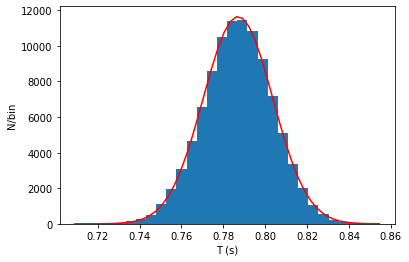

In [2]:
NbMC = 100000 # nombre de simulations Monte-Carlo
g = 9.812
l_simul = np.random.normal(0.1540,0.0065,NbMC)
T_simul = 2*np.pi*np.sqrt(l_simul/g)

T = np.mean(T_simul)
u_T = np.std(T_simul, ddof=1)
print('T = ',T)
print('u(T)=', u_T)

NbBin=30
plt.hist(T_simul,NbBin)
NbAbsc=50
T_list=np.linspace(np.min(T_simul),np.max(T_simul),NbAbsc)
plt.plot(T_list,NbMC/NbBin*(np.max(T_simul)-np.min(T_simul))*sp.stats.norm.pdf(T_list,T,u_T),'r-')
plt.xlabel('T (s)')
plt.ylabel('N/bin')

**Exercice 1 : incertitude associée à une distribution uniforme** une opératrice mesure la largeur d'une feuille A4 à l'aide d'un réglet gradué au demi-millimètre. Après avoir réalisé son mesurage, elle est certaine que cette largeur est comprise entre 21,025 cm et 19,975 cm. 

1.   Quelle est la valeur mesurée et l'incertitude-type associée à cette mesure? Pour cette première question on supposera que les valeurs possibles de la largeur de la feuille sont réparties uniformément dans l'intervalle pré-cité et on évaluera l'incertitude-type par une méthode de type B (on rappelle que pour une distribution rectangulaire sur un intervalle de demi-largeur $a$ l'écart-type associé vaut $\sigma = \frac{a}{\sqrt{3}}$).
2.   Retrouver ce résultat par une méthode de Monte-Carlo en utilisant Python.

**Corrigé de l'exercice 1 :** 


1.   $l=21,000$ cm et $u(l)=\frac{0,025}{\sqrt{3}}=0,014$ cm
2.   Pour retrouver ce résultat par une méthode de Monte-Carlo, on peut faire tourner le petit programme suivant :



u(l) =  0.01440556290985268


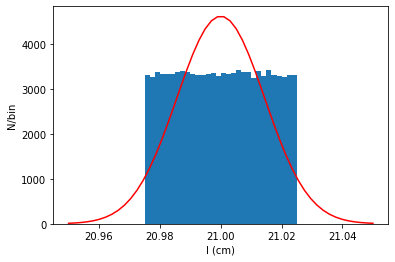

In [3]:
NbMC = 100000 # nombre de simulations Monte-Carlo
l_simul = np.random.uniform(20.975,21.025,NbMC) # simule NbMC valeurs uniformément entre 20,975 et 21,025
u_l_simul = np.std(l_simul,ddof=1) # prend l'écart-type des valeurs (contenues dans l_simul)

print('u(l) = ',u_l_simul)

NbBin=30
plt.hist(l_simul,NbBin)
plt.xlabel('l (cm)')
plt.ylabel('N/bin')
NbAbsc=50
l_list=np.linspace(20.95,21.05,NbAbsc)
plt.plot(l_list,NbMC/NbBin*(np.max(l_simul)-np.min(l_simul))*sp.stats.norm.pdf(l_list,21,u_l_simul),'r-')


**Exercice 2 : propagation d'incertitudes** 

Une autre opératrice mesure indépendamment la longueur de cette feuille de papier A4 dans des conditions très similaires. Elle est certaine que la longueur est comprise entre 29,675 cm et 29,725 cm. 


1.   Si l'on combine les mesures de ces deux opératrices, quelle est la valeur mesurée pour l'aire de la feuille A4 ? Quelle est l'incertitude-type associée ? (pour cette question on utilisera les formules de propagation des incertitudes)
2.   Retrouver ce dernier résultat par une méthode de Monte-Carlo



**Corrigé de l'exercice 2 :**


1.   $A=L\cdot l= 21 \times 29,7 = 623,70\:\mathrm{cm}^2$ et $u(A)=A\sqrt{\left(\frac{u(l)}{l}\right)^2+\left(\frac{u(L)}{L}\right)^2}=623,7\sqrt{\left(\frac{0,014}{21}\right)^2+\left(\frac{0,014)}{29,7}\right)^2}=0,52\:\mathrm{cm}^2$
2.   Pour retrouver ce dernier résultat par une méthode de Monte-Carlo, on peut faire tourner le petit programme suivant :

A =  623.6989810993448
u(A) =  0.5248276182683903


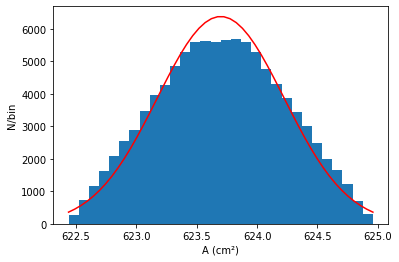

In [4]:
NbMC = 100000 # nombre de simulations Monte-Carlo
l_simul = np.random.uniform(20.975,21.025,NbMC) # simule NbMC valeurs uniformément entre 20,975 et 21,025
L_simul = np.random.uniform(29.675,29.725,NbMC) # simule NbMC valeurs uniformément entre 29,675 et 29,725
A_simul = l_simul * L_simul # calcule les NbMC valeurs correspondantes pour l'aire
u_A_simul = np.std(A_simul,ddof=1) # prend l'écart-type des valeurs (contenues dans A_simul)

NbBin=30
plt.hist(A_simul,NbBin)
plt.xlabel('A (cm²)')
plt.ylabel('N/bin')

print('A = ',np.mean(A_simul))
print('u(A) = ',u_A_simul)
NbAbsc=50
A_list=np.linspace(np.min(A_simul),np.max(A_simul),NbAbsc)
plt.plot(A_list,NbMC/NbBin*(np.max(A_list)-np.min(A_list))*sp.stats.norm.pdf(A_list,np.mean(A_simul),u_A_simul),'r-')


**Exercice 3 : estimation de 𝜋** 

On souhaite retrouver une valeur de $\pi$ par une méthode de Monte-Carlo. Pour cela référez-vous à l'article Wikipedia suivant : https://fr.wikipedia.org/wiki/Méthode_de_Monte-Carlo#Détermination_de_la_valeur_de_π  et mettez en œuvre cette méthode à l'aide d'un programme Python en simulant 10000 points.

estimation de π : 3.1436


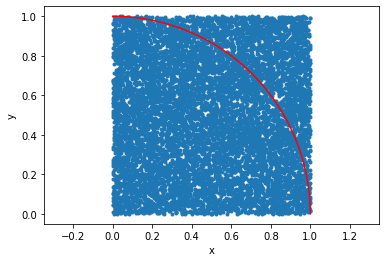

In [5]:
NbM = 10000 # nombre de points M
x_simul = np.random.uniform(0,1,NbM) # simule NbM valeurs uniformément entre 0 et 1
y_simul = np.random.uniform(0,1,NbM) # simule NbM valeurs uniformément entre 0 et 1
r_simul = np.sqrt(x_simul**2 + y_simul**2) # calcule la distance du point M au point (0,0)
NbD = np.count_nonzero(r_simul <= 1) # compte le nombre de points M appartenant au disque de rayon 1
pi_approx = 4*NbD/NbM # estime pi 

plt.plot(x_simul,y_simul,'.')
plt.axis('equal')
theta=np.linspace(0,np.pi/2,50)
plt.plot(np.cos(theta),np.sin(theta),'r-')
plt.xlabel('x')
plt.ylabel('y')

print('estimation de π :',pi_approx)

**Exercice 3bis (bonus) : incertitude sur cette estimation** 

1.   Quelle est l'incertitude-type associée à la détermination de $\pi$ par la méthode précédente lorsqu'on tire 10000 points $M$ ? Pour la déterminer utilisez une méthode de Monte-Carlo.
2.   La valeur que vous aviez trouvé à l'exercice 3 était-elle compatible avec la valeur de référence pour π : 3,14159265359

 

In [6]:
NbMC = 10000 # nombre de simulations Monte-Carlo
NbM = 10000 # nombre de points M simulés lors de chaque estimation de π 
pi_estim = np.zeros(NbMC)
for i in range(NbMC):
  x_simul = np.random.uniform(0,1,NbM) # simule NbM valeurs uniformément entre 0 et 1
  y_simul = np.random.uniform(0,1,NbM) # simule NbM valeurs uniformément entre 0 et 1
  r_simul = np.sqrt(x_simul**2 + y_simul**2) # calcule la distance du point M au point (0,0)
  NbD = np.count_nonzero(r_simul <= 1) # compte le nombre de points M appartenant au disque de rayon 1
  pi_estim[i] = 4*NbD/NbM # estime π 
u_pi_estim = np.std(pi_estim,ddof=1) # prend l'écart-type des valeurs (contenues dans pi_estim)
print('u(π_estim) = ',u_pi_estim)

u(π_estim) =  0.016329922357329798


In [7]:
z_score = abs(pi_approx-np.pi)/u_pi_estim
print('z-score = ',z_score)

z-score =  0.12292443076473322


Si le z-score obtenu est supérieur à 2, on conclut à tort à l'incompatibilité de la valeur trouvée à l'exercice 3 avec la valeur de pi. Ça n'arrive bien sûr que dans 5% des cas.

**Exercice 4 :  incertitude sur une moyenne** 
 
9 binômes d'une classe mesurent la concentration d'une même solution. La moyenne des valeurs obtenues par ces binômes vaut $1,018\:\mathrm{mol}\cdot\mathrm{L}^{-1}$. L'écart-type des valeurs obtenues par ces binômes vaut $0,150\:\mathrm{mol}\cdot\mathrm{L}^{-1}$. Leur professeur leur indique que l'incertitude-type sur la moyenne de leurs valeurs individuelles est trois fois plus faible, mais les élèves sont incrédules. Mettez en œuvre une méthode de Monte-Carlo pour justifier ce résultat.

In [8]:
NbMC = 10000
moy_c_simul = np.zeros(NbMC)
for i in range(NbMC):
  c_simul = np.random.normal(1.018,0.15,9) # simule les résultats de 9 binômes individuels
  moy_c_simul[i] = np.mean(c_simul) # calcule la moyenne de ces 9 résultats
u_moy_c = np.std(moy_c_simul,ddof=1) # calcule l'écart-type de ces moyennes
print('u(moy) = ',u_moy_c)

u(moy) =  0.0497319675492356


Le résultat obtenu est très proche de $\frac{0,150}{\sqrt{9}}=\frac{0,150}{3}=0,50\:\mathrm{mol}\cdot\mathrm{L}^{-1}$

**Exercice 4 (bonus) : incertitude sur une moyenne (cas général)** 

À l'aide d'une simulation Monte-Carlo, montrer que le résultat précédent est généralisable et que l'incertitude-type associée à la moyenne des résultats de N binômes est $\sqrt{N}$ fois plus faible que l'incertitude-type associée aux résultats individuels des binômes.

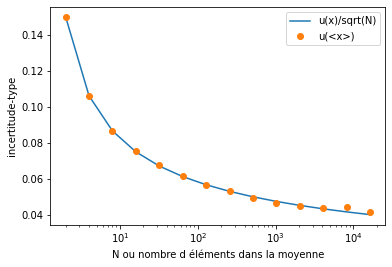

In [9]:
# le programme proposé ici n'est pas le plus astucieux : il est coûteux numériquement (double boucle) 
# mais il est simple car il ne nécessite que très peu de connaissances en Python ...

N2b = 20 # log en base 2 du nombre maximum de simulation : si Nmoy = 20 on fera 2**20 simulation soit environ 10**6 
Nbinomes = 2**N2b # nombre de binômes
Nmoy = 15 # nombre de moyennes (un peu inférieur à N2b pour avoir un peu de statistique) 
c_simul = np.random.normal(1.018,0.15,Nbinomes) # simule des résultats pour un très grand nombre de binômes
u_moy_c = np.zeros(Nmoy-1)
index=np.arange(1,Nmoy,1) # un index allant de 1 à Nmoy
imoy = 2**index # nombre d'éléments par moyenne
for i in index:
  N = int(Nbinomes/(2**i))
  moy = np.zeros(N)
  for j in range(N):
    moy[j] = np.mean(c_simul[j*i:(j+1)*i])
  u_moy_c[i-1] = np.std(moy,ddof=1)
plt.xscale('log') # échelle logarithmique sur l'axe des absisses pour s'y retrouver
plt.plot(imoy,u_moy_c[0]/np.sqrt(index),label='u(x)/sqrt(N)')
plt.plot(imoy,u_moy_c,'o',label='u(<x>)')
plt.xlabel('N ou nombre d éléments dans la moyenne')
plt.ylabel('incertitude-type')
plt.legend()
plt.show()